# Regression Model Comparison Pipeline

This notebook presents a complete and well-documented machine learning pipeline for comparing regression models using the California Housing dataset.


## Imports

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

## Data Loading

In [ ]:
# Load dataset 
# the dataset is small, clean, and well-structured, good for regression tasks
data = fetch_california_housing(as_frame=True)
df = data.frame

In [34]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [35]:
# Display the first few rows of the dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Problem Definition

In [ ]:
# Define the problem as a supervised regression task
# The target variable is 'MedHouseVal' (Median House Value)

#  Features and Target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

## Splitting dataset into training and testing

In [ ]:
# 20% of the data will be used for testing
# random_state ensures reproducibility

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Exploratory Data Analysis

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


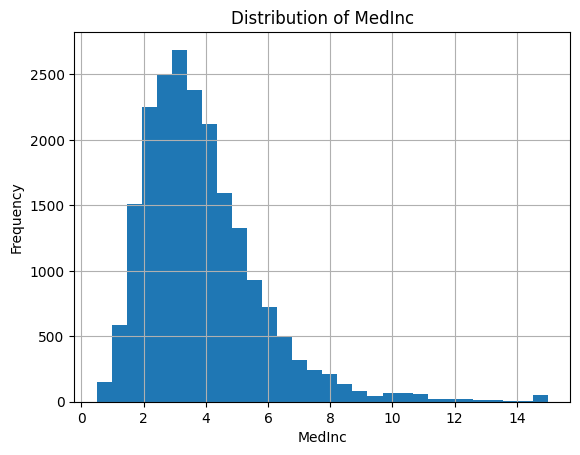

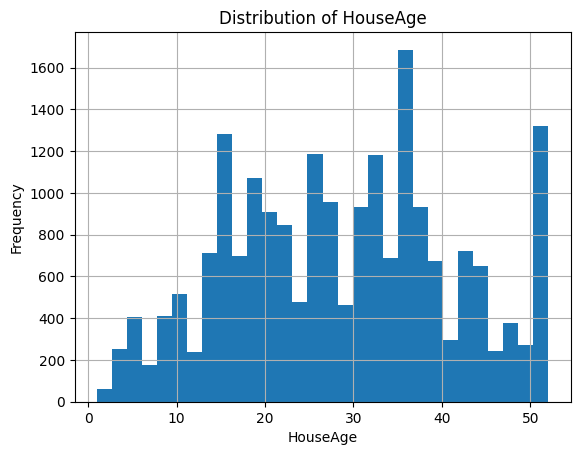

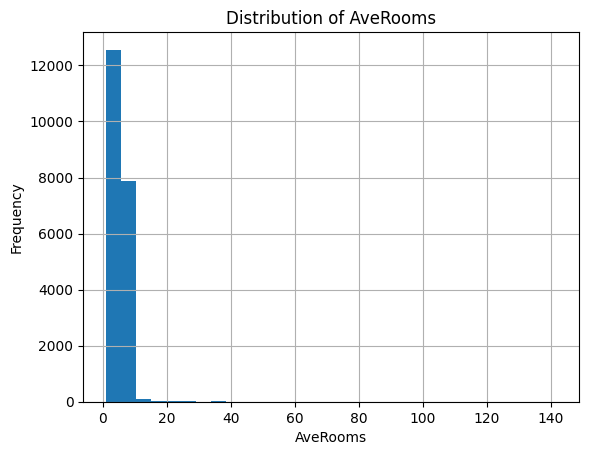

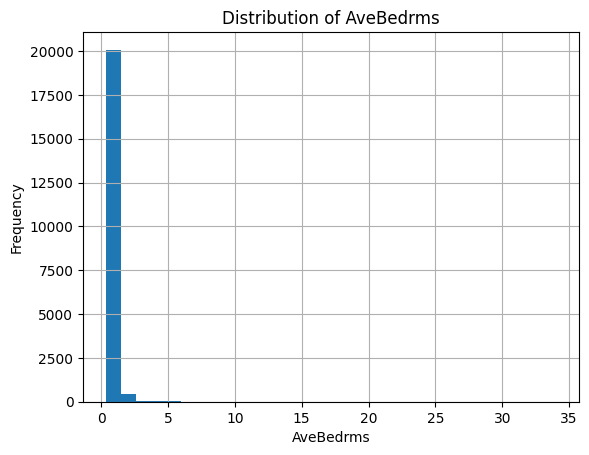

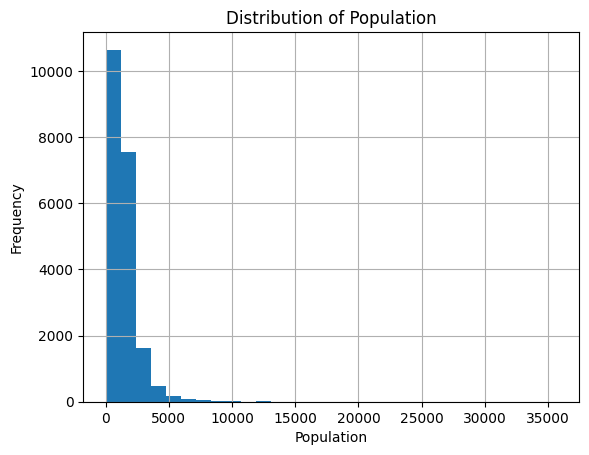

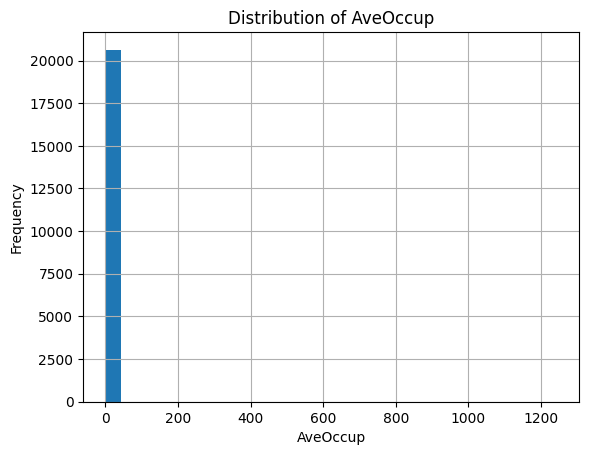

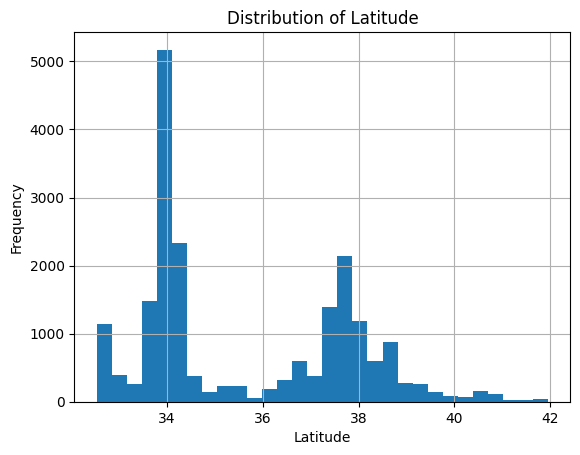

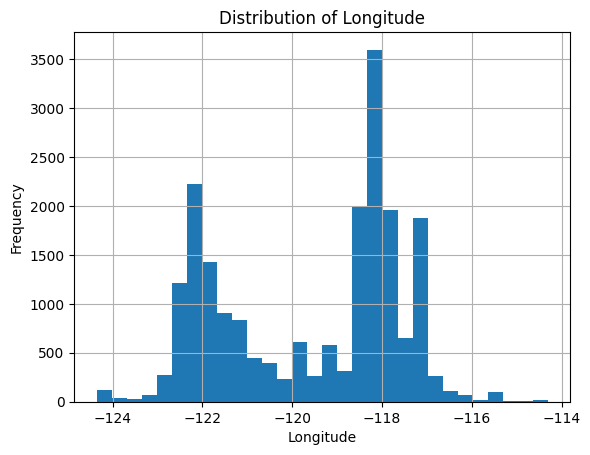

In [ ]:
# Visualize the distribution of features
for col in X.columns:
    plt.figure()
    plt.hist(X[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [26]:
corr = df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [27]:
corr = df.corr()
print(corr['MedHouseVal'].sort_values(ascending=False))

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


# Preprocessing Pipeline

In [ ]:
# use SimpleImputer to handle missing values and StandardScaler for feature scaling

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
# define the models to be evaluated

models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    'CatBoost': CatBoostRegressor(iterations=100, silent=True, random_seed=42)
}

In [ ]:
# Evaluate models using cross-validation 

results = []
for name, model in models.items():
    pipe = Pipeline([
        ('preproc', numeric_pipeline),
        ('model', model)
    ])
    scores = cross_val_score(
        pipe, X_train, y_train,
        scoring='neg_mean_squared_error',
        cv=5, n_jobs=-1
    )
    rmse_scores = (-scores) ** 0.5
    results.append({
        'model': name,
        'rmse_mean': rmse_scores.mean(),
        'rmse_std': rmse_scores.std()
    })

df_results = pd.DataFrame(results).sort_values('rmse_mean')
df_results

,model,rmse_mean,rmse_std
3,CatBoost,0.472865,0.007099
2,XGBoost,0.476472,0.005593
1,RandomForest,0.511520,0.004524
0,LinearRegression,0.720527,0.010285


## Evaluation on Test Set

In [39]:
best_model_name = df_results.iloc[0]['model']
best_model = models[best_model_name]

pipeline = Pipeline([
    ('preproc', numeric_pipeline),
    ('model', best_model)
])

pipeline.fit(X_train, y_train)

preds = pipeline.predict(X_test)
test_rmse = np.sqrt(((preds - y_test) ** 2).mean())
print(f"Best Model: {best_model_name}")
print(f"Test RMSE: {test_rmse:.4f}")

Best Model: CatBoost
Test RMSE: 0.4665


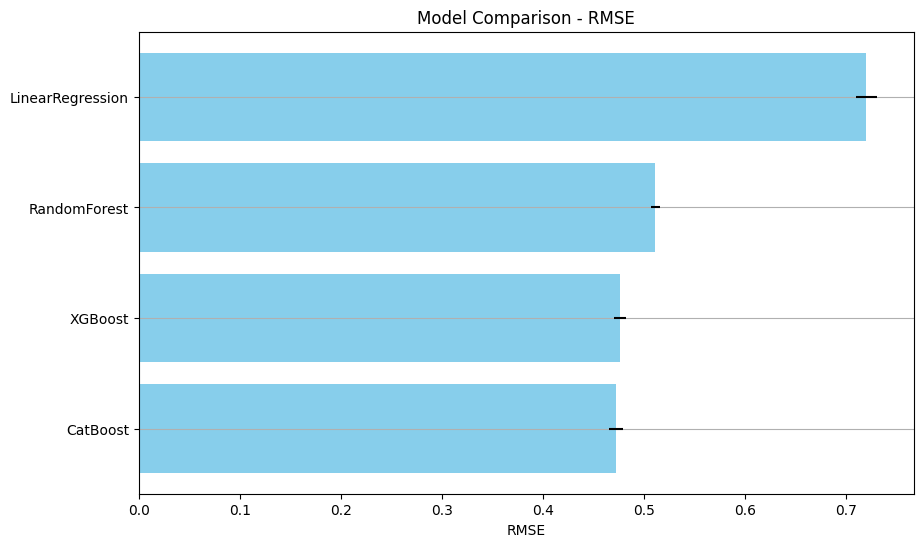

In [ ]:
# Plot the RMSE results for each model
plt.figure(figsize=(10, 6))
plt.barh(df_results['model'], df_results['rmse_mean'], xerr=df_results['rmse_std'], color='skyblue')
plt.xlabel('RMSE')
plt.title('Model Comparison - RMSE')
plt.grid(axis='x')
plt.show()

## Inference

In [42]:
# inference on the best model
def predict_house_value(features):
    """
    Predict the median house value given the features.
    
    :param features: A dictionary containing feature values.
    :return: Predicted median house value.
    """
    input_df = pd.DataFrame([features])
    prediction = pipeline.predict(input_df)
    return prediction[0]

# Example usage of the prediction function
example_features = {
    'MedInc': 3.0,
    'HouseAge': 20.0,
    'AveRooms': 5.0,
    'AveBedrms': 2.0,
    'Population': 1000.0,
    'AveOccup': 2.5,
    'Latitude': 34.0,
    'Longitude': -118.0
}
predicted_value = predict_house_value(example_features)
print(f"Predicted Median House Value: ${predicted_value:.2f}")

Predicted Median House Value: $1.89
